In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming your dataset is in CSV format
df = pd.read_csv('/Amazon Sales data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the first few rows of the DataFrame
print(df.head())

                              Region                Country        Item Type Sales Channel Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit
0              Australia and Oceania                 Tuvalu        Baby Food       Offline              H   5/28/2010  669165933   6/27/2010        9925      255.28     159.42     2533654.00  1582243.50     951410.50
1  Central America and the Caribbean                Grenada           Cereal        Online              C   8/22/2012  963881480   9/15/2012        2804      205.70     117.11      576782.80   328376.44     248406.36
2                             Europe                 Russia  Office Supplies       Offline              L  05-02-2014  341417157  05-08-2014        1779      651.21     524.96     1158502.59   933903.84     224598.75
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits        Online              C   6/20/2014  514321792  07

In [ ]:
# Drop duplicate rows based on all columns
df_no_duplicates = df.drop_duplicates()

# Print the resulting DataFrame without duplicates
print(df_no_duplicates.head())
df

                              Region                Country        Item Type Sales Channel Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit
0              Australia and Oceania                 Tuvalu        Baby Food       Offline              H   5/28/2010  669165933   6/27/2010        9925      255.28     159.42     2533654.00  1582243.50     951410.50
1  Central America and the Caribbean                Grenada           Cereal        Online              C   8/22/2012  963881480   9/15/2012        2804      205.70     117.11      576782.80   328376.44     248406.36
2                             Europe                 Russia  Office Supplies       Offline              L  05-02-2014  341417157  05-08-2014        1779      651.21     524.96     1158502.59   933903.84     224598.75
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits        Online              C   6/20/2014  514321792  07

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month, year, and year-month information
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Year-Month'] = df['Order Date'].dt.to_period('M')


In [ ]:
# Group by month, year, and year-month
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Ship Month,Ship Year,Month,Year,Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,6,2010,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,9,2012,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,5,2014,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,7,2014,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2,2013,2,2013,2013-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,9,2011,7,2011,2011-07
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,12,2011,11,2011,2011-11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,6,2016,6,2016,2016-06
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,8,2015,7,2015,2015-07


<ipython-input-30-ec1bb2456aca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


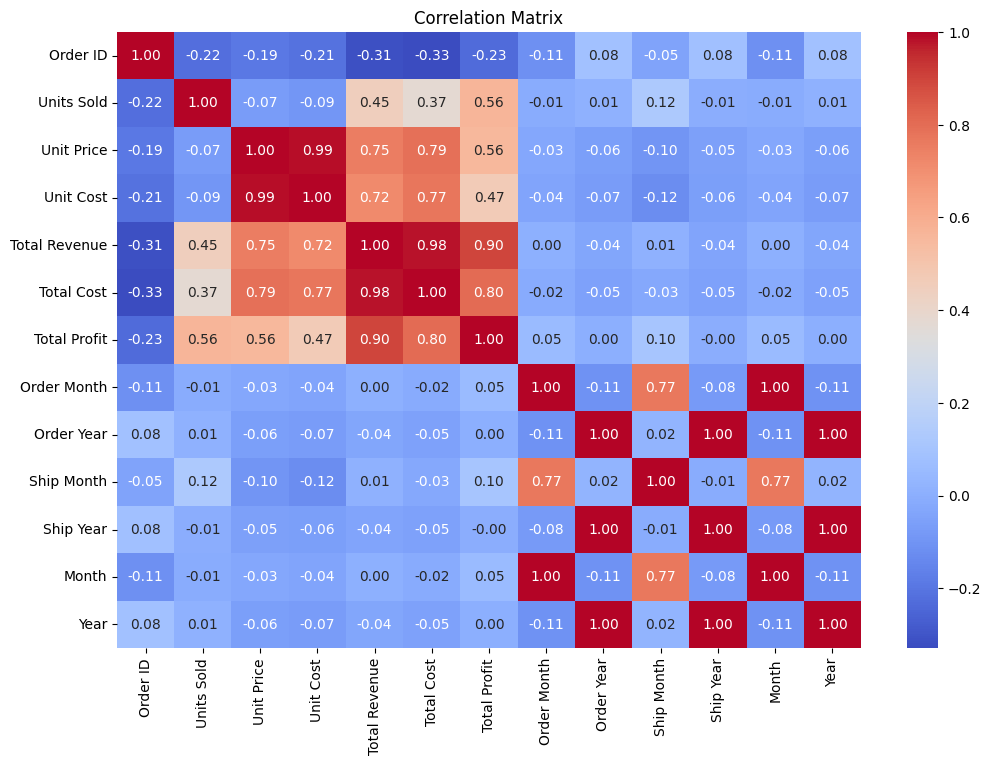

In [ ]:
# Convert 'Order Date' to datetime with explicit format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d').copy()

# Extract month, year, and year-month information
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Year-Month'] = df['Order Date'].dt.to_period('M')


In [ ]:
# Group by month, year, and year-month
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,2011-07
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,2011-11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,2016-06
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


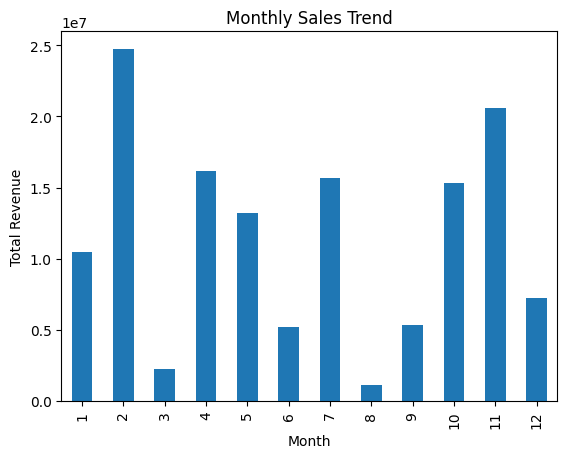

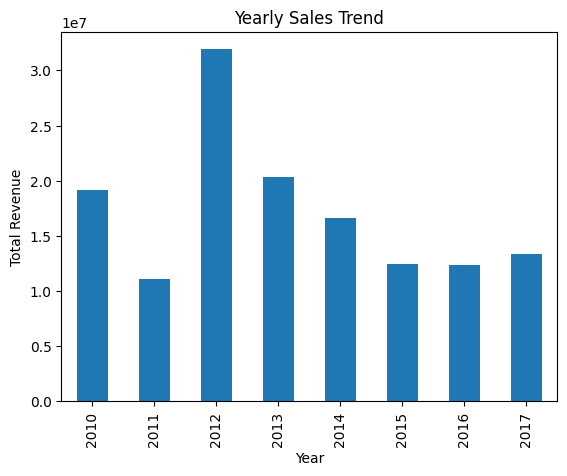

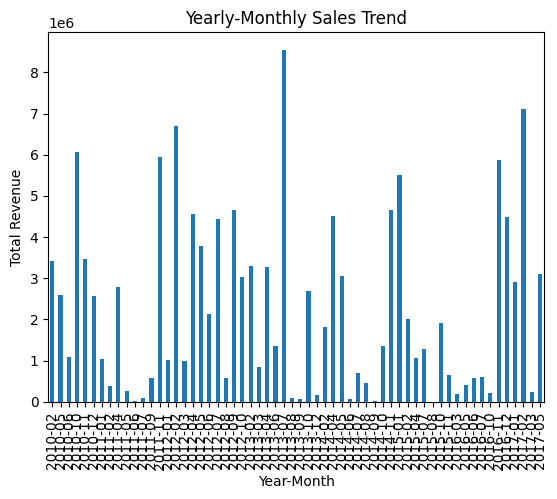

In [ ]:
# Plotting monthly sales
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Revenue', title='Monthly Sales Trend')
plt.show()

# Plotting yearly sales
yearly_sales.plot(kind='bar', xlabel='Year', ylabel='Total Revenue', title='Yearly Sales Trend')
plt.show()

# Plotting yearly-monthly sales
yearly_monthly_sales.plot(kind='bar', xlabel='Year-Month', ylabel='Total Revenue', title='Yearly-Monthly Sales Trend')
plt.show()


<ipython-input-41-d14a38910c58>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


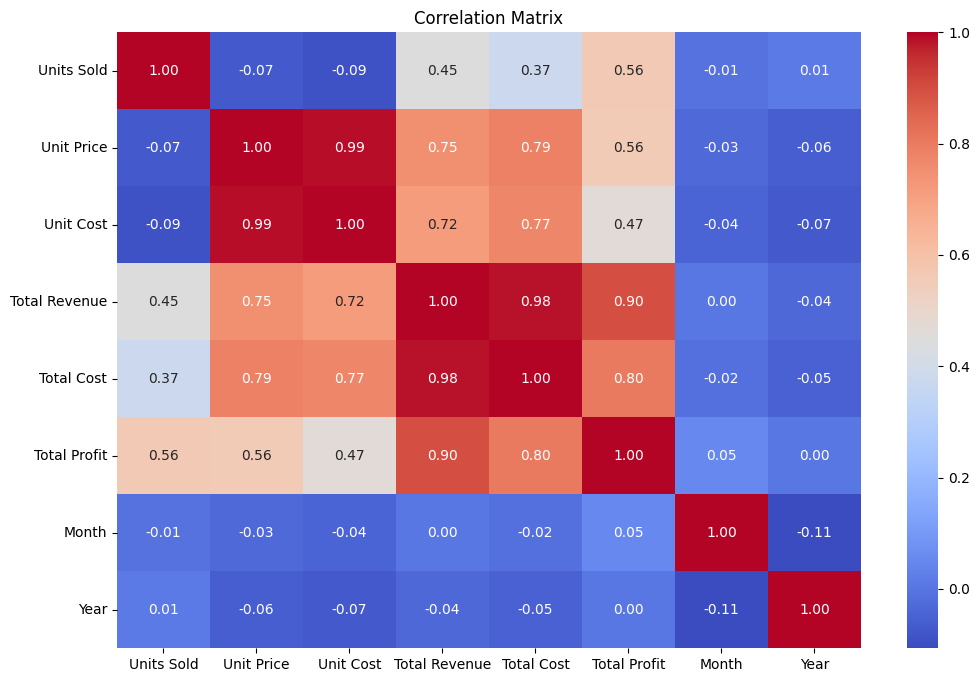

In [ ]:
#for key metrics and factors
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df #orderID and Shipdate is removed due to its unecessary

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,2011-07
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,2011-11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,2016-06
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07
